# <font color="#1B4F72">Training results analysis</font>

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import utils.visualization_utils as plot_utils 

import itertools
import ast

path = "./results/"
ml_models = ['knn', 'rf', 'sgd']
subset_types = ['base', 'complete', 'sub']
preprocessing_types=['no_scaling', 'standard_scaling', 'minmax_scaling']

## <font color="#21618C"> 1. Classic machine learning models </font>

***

Three chosen machine learning models: **_K-nearest neighbors_**, **_Random Forest_** and **_Stochastic Gradient Descent_**.

Each model was trained on 3 dataset versions and different preprocessing types:

- <font color="#B03A2E">**Subset version** </font>
    - Base set (2 features)
    - Complete set (15 features)
    - Sub set (5 features)
    
- <font color="#B03A2E">**Preprocessing type**</font>
    - No scaling applied
    - Standard scaling
    - Minmax scaling 

In [3]:
ml_results = pd.DataFrame()

for model_name in ml_models:
    ml_results = ml_results.append(pd.read_csv(f'{path}{model_name}_results.csv'))

ml_results = ml_results.drop("Unnamed: 0",axis=1).reset_index(drop=True)

In [4]:
f'Training classic machine learning models: {ml_results.shape[0]} results'

'Training classic machine learning models: 27 results'

In [5]:
ml_results.head(2)

,model_type,dataset_type,preprocessing_type,params,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,rae_train,rae_test
0,knn,base,no_scaling,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.399870,0.363572,0.000135,0.000141,0.011622,0.011889,0.669082,0.673178
1,knn,base,standard_scaling,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.398843,0.359781,0.000135,0.000142,0.011632,0.011925,0.667766,0.675080


### <font color="#2874A6">1.1 K-Nearest Neighbors Regressor </font>
Regression based on k-nearest neighbors.

Models trained via k-fold cross validation on training set.

<font color="#B03A2E">**Hyperparams**</font>:
- number of neighbors': 5, 10, 20, 25, 30, 50, 60, 100, 150, 250
- weights: uniform, distance


#### <font color="#2E86C1">1.1.1 KNN: best results </font>
Best KNN results and their params.

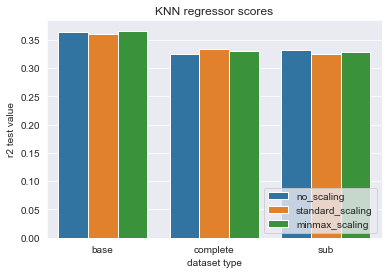

In [6]:
knn_results = ml_results[ml_results['model_type'] == 'knn']

plot_utils.grouped_bar_plot(x='dataset_type', y='r2_test', hue='preprocessing_type', data=knn_results, model_name='KNN regressor')

In [7]:
for i, row in knn_results[['dataset_type', 'preprocessing_type', 'params']].iterrows():
    params = ast.literal_eval(row['params'])
    print(
        ''' 
        {0}set, {1}
        params:
            neighbors: {2},
            weights:{3}
        ----------------------'''.format(row['dataset_type'],row['preprocessing_type'], params['n_neighbors'], params['weights']))

 
        baseset, no_scaling
        params:
            neighbors: 20,
            weights:uniform
        ----------------------
 
        baseset, standard_scaling
        params:
            neighbors: 20,
            weights:uniform
        ----------------------
 
        baseset, minmax_scaling
        params:
            neighbors: 20,
            weights:uniform
        ----------------------
 
        completeset, no_scaling
        params:
            neighbors: 60,
            weights:uniform
        ----------------------
 
        completeset, standard_scaling
        params:
            neighbors: 100,
            weights:uniform
        ----------------------
 
        completeset, minmax_scaling
        params:
            neighbors: 50,
            weights:uniform
        ----------------------
 
        subset, no_scaling
        params:
            neighbors: 100,
            weights:uniform
        ----------------------
 
        subset, standard_scaling
        

#### <font color="#2E86C1">1.1.2 KNN: score comparison </font>
Comparison between R2 score on training and test set.

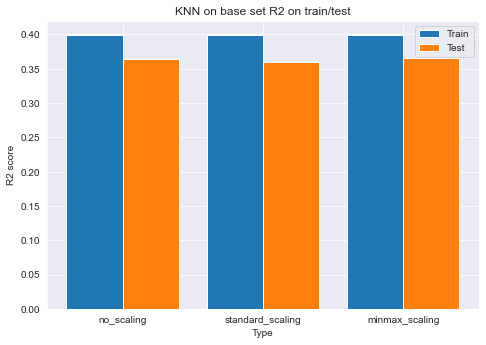

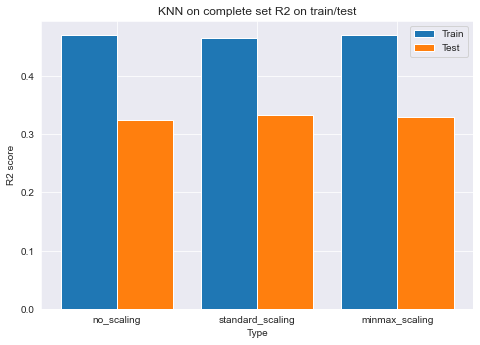

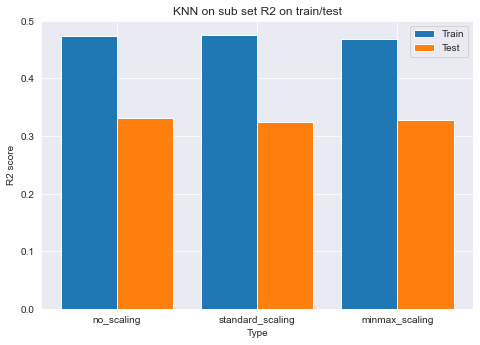

In [8]:
for set_type in subset_types:
    result = knn_results[knn_results['dataset_type'] == set_type]
    plot_utils.train_test_bar_plot(result['r2_train'], result['r2_test'], preprocessing_types, 'R2 score', f'KNN on {set_type} set R2 on train/test')

### <font color="#2874A6"> 1.2. Random forest regressor </font>

Regression based on random forest.

Models trained via cross validation on training set.

<font color="#B03A2E">**Hyperparams**</font>:
- number of estimators: 200, 300, 500

#### <font color="#2E86C1"> 1.2.1 RF: best results </font>
Best RF results and their params.

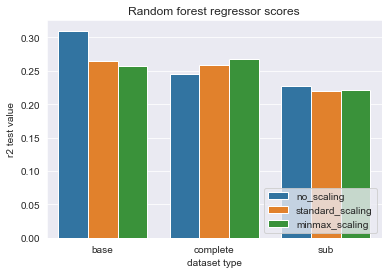

In [9]:
rf_results = ml_results[ml_results['model_type'] == 'rf']
plot_utils.grouped_bar_plot(x='dataset_type', y='r2_test', hue='preprocessing_type', data= rf_results, model_name='Random forest regressor')

In [10]:
for i, row in rf_results[['dataset_type', 'preprocessing_type', 'params']].iterrows():
    params = ast.literal_eval(row['params'])
    print(
        ''' 
        {0}set, {1}
        params:
            n estimators: {2}
        -----------------------'''.format(row['dataset_type'],row['preprocessing_type'], params['n_estimators']))

 
        baseset, no_scaling
        params:
            n estimators: 500
        ----------------------
 
        baseset, standard_scaling
        params:
            n estimators: 200
        ----------------------
 
        baseset, minmax_scaling
        params:
            n estimators: 500
        ----------------------
 
        completeset, no_scaling
        params:
            n estimators: 300
        ----------------------
 
        completeset, standard_scaling
        params:
            n estimators: 500
        ----------------------
 
        completeset, minmax_scaling
        params:
            n estimators: 500
        ----------------------
 
        subset, no_scaling
        params:
            n estimators: 500
        ----------------------
 
        subset, standard_scaling
        params:
            n estimators: 500
        ----------------------
 
        subset, minmax_scaling
        params:
            n estimators: 200
        ---------------------

#### <font color="#2E86C1"> 1.2.2 RF: score comparison </font>
Comparison between R2 score on training and test set.

Large <font color="#B03A2E">**overfitting**</font>. 

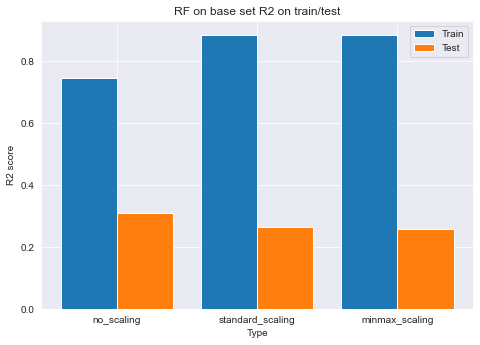

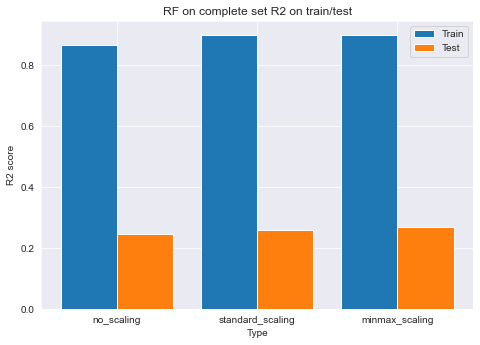

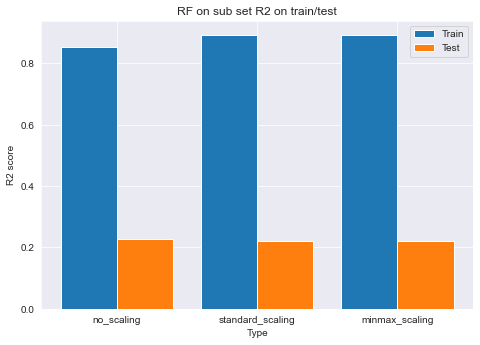

In [11]:
for set_type in subset_types:
    result = rf_results[rf_results['dataset_type'] == set_type]
    plot_utils.train_test_bar_plot(result['r2_train'], result['r2_test'], preprocessing_types, 'R2 score', f'RF on {set_type} set R2 on train/test')

### <font color="#2874A6"> 1.3. Stochastic gradient descend regressor </font>

Regression based on SGD.

Models trained via cross validation on training set.

<font color="#B03A2E">**Hyperparams**</font>:
- early stopping: True, False
- alpha: 0.1, 0.01, 0.001, 0.001, 0.001, 0.001, 0,0001

#### <font color="#2E86C1"> 1.3.1 SGD: best results </font>
Best SGD results and their params.

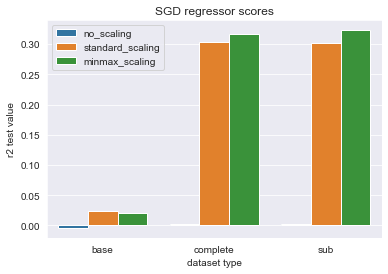

In [12]:
sgd_results = ml_results[ml_results['model_type'] == 'sgd']
plot_utils.grouped_bar_plot(x='dataset_type', y='r2_test', hue='preprocessing_type', data= sgd_results, model_name='SGD regressor', legend_pos="upper left")

#### <font color="#2E86C1"> 1.3.2 SGD: score comparison </font>
Comparison between R2 score on training and test set.

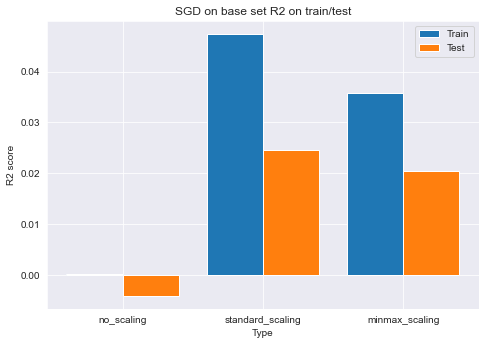

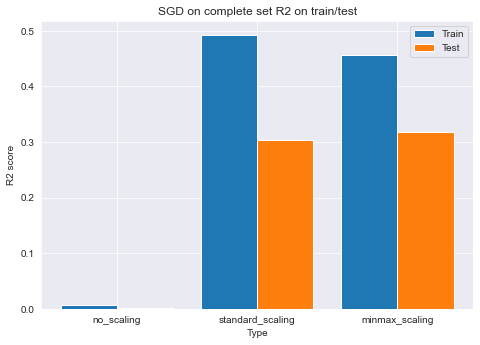

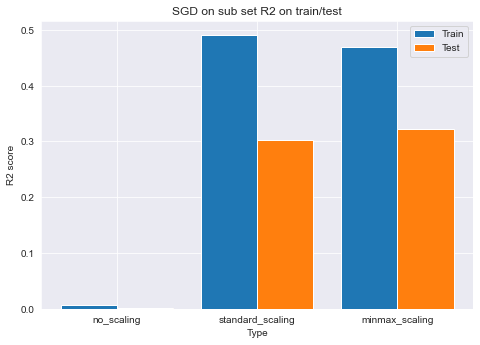

In [13]:
for set_type in subset_types:
    result = sgd_results[sgd_results['dataset_type'] == set_type]
    plot_utils.train_test_bar_plot(result['r2_train'], result['r2_test'], preprocessing_types, 'R2 score', f'SGD on {set_type} set R2 on train/test')

## <font color="#21618C"> 2. Neural networks </font>

***

1092 trained neural network.

Each net was trained on 3 dataset versions and different preprocessing types:

- <font color="#B03A2E">**Subset version**</font>:
    - Base set (2 features)
    - Complete set (15 features)
    - Sub set (5 features)

- <font color="#B03A2E">**Preprocessing type**</font>:
    - No scaling applied (_only for baseset_)
    - Minmax scaling (_on all subsets_)


In [14]:
nn_results = pd.DataFrame()

for subset_type in subset_types:
    nn_results = nn_results.append(pd.read_csv(f'{path}neural_network_{subset_type}set.csv'))

nn_results = nn_results.drop("Unnamed: 0",axis=1).reset_index(drop=True)

nn_results.head(2)

,model_type,dataset_type,preprocessing_type,params,mean_mse_epochs,last_mse_epochs,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,rae_train,rae_test
0,neural_network,base,no_scaling,"{'hs': 100, 'n_layers': 2, 'n_epochs': 500, 'b...","[0.00023147567900685736, 0.0002282007805591162...","[0.00028920447221025825, 0.0002889244060497731...",0.023870,0.005153,0.000220,0.000221,0.014823,0.014865,3165.8533,821.07340
1,neural_network,base,no_scaling,"{'hs': 100, 'n_layers': 2, 'n_epochs': 500, 'b...","[0.0020520701073110104, 0.0017489216003853541,...","[0.0014486503787338734, 0.002717218128964305, ...",-0.137159,-0.185583,0.000256,0.000263,0.015999,0.016227,3797.4985,1013.76025


### <font color="#2874A6"> 2.1 Best results </font>

#### <font color="#2E86C1"> 2.1.1 Best R2 test </font>
The best three neural net with higher R2 score on test set.

It's possible to observe that these best results are all related to a net trained on the <font color="#B03A2E">subset with only 5 features selected </font>. 

In [15]:
nn_results.sort_values(by=['r2_test'], ascending=False).head(3)

,model_type,dataset_type,preprocessing_type,params,mean_mse_epochs,last_mse_epochs,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,rae_train,rae_test
880,neural_network,sub,minmax_scaling,"{'hs': 50, 'n_layers': 3, 'n_epochs': 1000, 'b...","[0.0007498356448755098, 0.00020477936665814085...","[0.00021449897030834109, 0.0002155593392672017...",0.445773,0.336833,0.000125,0.000147,0.011169,0.012136,3758.8210,933.0376
1072,neural_network,sub,minmax_scaling,"{'hs': 50, 'n_layers': 3, 'n_epochs': 1000, 'b...","[0.0007498356448755098, 0.00020477936665814085...","[0.00021449897030834109, 0.0002155593392672017...",0.445773,0.336833,0.000125,0.000147,0.011169,0.012136,3758.8210,933.0376
964,neural_network,sub,minmax_scaling,"{'hs': 200, 'n_layers': 2, 'n_epochs': 1000, '...","[0.000540235880180262, 0.00019863986277154515,...","[0.0002705020597204566, 0.00021840711997356266...",0.469075,0.333263,0.000120,0.000148,0.010932,0.012169,3889.8271,967.5998


####<font color="#2E86C1">  2.1.2 Best R2 train </font>

The best three neural net with higher R2 score on train set.

In [16]:
nn_results.sort_values(by=['r2_train'], ascending=False).head(3)

,model_type,dataset_type,preprocessing_type,params,mean_mse_epochs,last_mse_epochs,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,rae_train,rae_test
960,neural_network,sub,minmax_scaling,"{'hs': 200, 'n_layers': 2, 'n_epochs': 1000, '...","[0.00035834543366665737, 0.0003005121308468425...","[0.00024092946841847152, 0.0001894332090159878...",0.490210,0.291978,0.000115,0.000157,0.010712,0.01254,3824.5444,947.9064
768,neural_network,sub,minmax_scaling,"{'hs': 200, 'n_layers': 2, 'n_epochs': 1000, '...","[0.00035834543366665737, 0.0003005121308468425...","[0.00024092946841847152, 0.0001894332090159878...",0.490210,0.291978,0.000115,0.000157,0.010712,0.01254,3824.5444,947.9064
364,neural_network,complete,minmax_scaling,"{'hs': 200, 'n_layers': 2, 'n_epochs': 500, 'b...","[0.001785069845097426, 0.00016309376223944128,...","[0.00012791303743142635, 0.0001303852041019126...",0.484236,0.308803,0.000116,0.000154,0.010775,0.01239,3830.5376,954.9979


####  <font color="#2E86C1"> 2.1.3 Best result for each dataset and preprocessing type </font>

It's possibile to observe that the <font color="#B03A2E">training on base set</font> has the <font color="#B03A2E">worst performance </font> with all preprocessing type. 


    BEST PARAMS with minmax scaling:
        Base set: {'hs': 200, 'n_layers': 2, 'n_epochs': 1000, 'b_size': 256, 'l_rate': 0.1, 'gamma': 0.03, 'dropout': 0}
        Complete set: {'hs': 200, 'n_layers': 3, 'n_epochs': 500, 'b_size': 512, 'l_rate': 0.1, 'gamma': 0.05, 'dropout': 0}
        Sub set: {'hs': 50, 'n_layers': 3, 'n_epochs': 1000, 'b_size': 256, 'l_rate': 0.1, 'gamma': 0.03, 'dropout': 0}
    
    


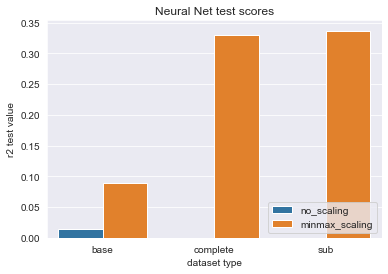

In [17]:
nn_best_results = pd.DataFrame()

for sub_type, pr_type in itertools.product(subset_types, ['no_scaling', 'minmax_scaling']):
    to_mantain = (nn_results['dataset_type'] == sub_type) & (nn_results['preprocessing_type'] == pr_type)
    
    nn_best_results = nn_best_results.append(nn_results[to_mantain].sort_values(by=['r2_test'], ascending=False).head(1))

print(
    f'''
    BEST PARAMS with minmax scaling:
        Base set: {nn_best_results[nn_best_results['dataset_type'] == 'base']['params'].values[0]}
        Complete set: {nn_best_results[nn_best_results['dataset_type'] == 'complete']['params'].values[0]}
        Sub set: {nn_best_results[nn_best_results['dataset_type'] == 'sub']['params'].values[0]}
    
    '''
)

plot_utils.grouped_bar_plot(x='dataset_type', y='r2_test', hue='preprocessing_type', data=nn_best_results, model_name='Neural Net test')



### <font color="#2874A6"> 2.2 Score comparison </font>
Comparison between R2 score on training and test set.

,model_type,dataset_type,preprocessing_type,params,mean_mse_epochs,last_mse_epochs,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,rae_train,rae_test
166,neural_network,base,minmax_scaling,"{'hs': 200, 'n_layers': 2, 'n_epochs': 500, 'b...","[0.001663011307495513, 0.0002736277924019045, ...","[0.0003873627574648708, 0.00023087621957529336...",0.112814,0.088707,0.000200,0.000202,0.014131,0.014227,3344.0283,864.3954
578,neural_network,complete,minmax_scaling,"{'hs': 200, 'n_layers': 3, 'n_epochs': 500, 'b...","[0.00022858001466374844, 0.0002186827228537627...","[0.00030527639319188893, 0.0002863445261027664...",0.447061,0.329975,0.000124,0.000149,0.011156,0.012199,3755.7227,933.9575
880,neural_network,sub,minmax_scaling,"{'hs': 50, 'n_layers': 3, 'n_epochs': 1000, 'b...","[0.0007498356448755098, 0.00020477936665814085...","[0.00021449897030834109, 0.0002155593392672017...",0.445773,0.336833,0.000125,0.000147,0.011169,0.012136,3758.8210,933.0376


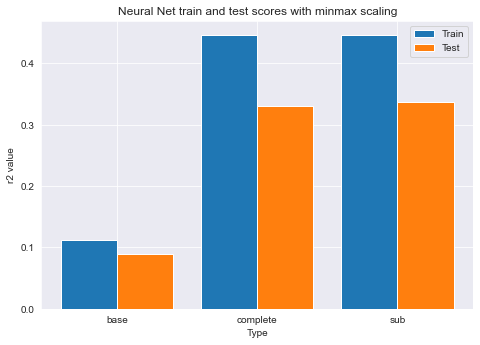

In [18]:
nn_best_results = nn_best_results[nn_best_results['preprocessing_type'] == 'minmax_scaling']

plot_utils.train_test_bar_plot(nn_best_results['r2_train'], nn_best_results['r2_test'], subset_types, 'r2 value', 'Neural Net train and test scores with minmax scaling')

nn_best_results

Line plots representing the mean mse loss over epochs  for the best neural net configuration previously presented. 

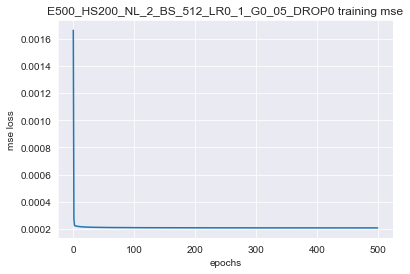

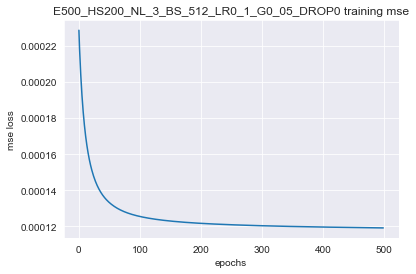

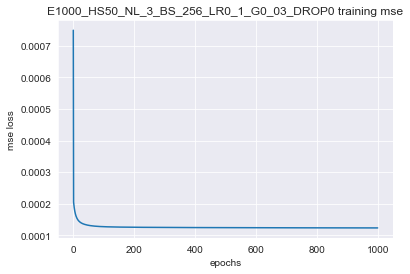

In [19]:
for index, row in nn_best_results.iterrows():
    plot_utils.plot_loss(ast.literal_eval(row['mean_mse_epochs']), ast.literal_eval(row['params']), 'mse', to_save=False)
    plt.show()

## <font color="#21618C"> 3. Conclusion: best model </font>

***

In [30]:
total_results = ml_results.append(nn_best_results)
total_results.sort_values(by=['r2_test', 'r2_train'], ascending=False).head(3)

,model_type,dataset_type,preprocessing_type,params,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,rae_train,rae_test,mean_mse_epochs,last_mse_epochs
2,knn,base,minmax_scaling,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.399263,0.365609,0.000135,0.000141,0.011628,0.011870,0.667499,0.672131,NaN,NaN
0,knn,base,no_scaling,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.399870,0.363572,0.000135,0.000141,0.011622,0.011889,0.669082,0.673178,NaN,NaN
1,knn,base,standard_scaling,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.398843,0.359781,0.000135,0.000142,0.011632,0.011925,0.667766,0.675080,NaN,NaN
